In [47]:
 # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time


# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [48]:
api_key = "704562a0e399a1bdec66df88ddfde5fe"

In [49]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

In [50]:
url = f"https://api.openweathermap.org/data/2.5/weather?q=Denver&APPID={api_key}units=imperial"
url

'https://api.openweathermap.org/data/2.5/weather?q=Denver&APPID=704562a0e399a1bdec66df88ddfde5feunits=imperial'

In [51]:
# Temperature (F) vs. Latitude
# Humidity (%) vs. Latitude
# Cloudiness (%) vs. Latitude
# Wind Speed (mph) vs. Latitude

In [52]:
response = requests.get(url)
jason = response.json()

In [64]:
jason.keys()
jason

{'coord': {'lon': 31.65, 'lat': 63.93},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03n'}],
 'base': 'stations',
 'main': {'temp': 24.44,
  'pressure': 986.5,
  'humidity': 99,
  'temp_min': 24.44,
  'temp_max': 24.44,
  'sea_level': 1009.35,
  'grnd_level': 986.5},
 'wind': {'speed': 2.42, 'deg': 60.5039},
 'clouds': {'all': 44},
 'dt': 1540434113,
 'sys': {'message': 0.0039,
  'country': 'RU',
  'sunrise': 1540444378,
  'sunset': 1540476044},
 'id': 524100,
 'name': 'Muyezerskiy',
 'cod': 200}

In [55]:
data = []
for city in cities:
        
    # build a URL for the city
    url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&APPID={api_key}&units=imperial"
    
    # use request to grab json information
    jason = requests.get(url).json()
    print(jason)
    try:
        # unpack json information
        jason.keys()
        temp = jason["main"]["temp"]

        jason.keys()
        humidity = jason["main"]["humidity"]

        lat = jason["coord"]["lat"]

        wind_speed = jason["wind"]["speed"]

        cloudiness = jason["clouds"]["all"]

        # output this information to a dictionary object
        data.append([temp, humidity, lat, wind_speed, cloudiness, city])
        
    except:
        pass

{'coord': {'lon': 80.42, 'lat': 5.97}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 81, 'pressure': 1018.44, 'humidity': 99, 'temp_min': 81, 'temp_max': 81, 'sea_level': 1026.01, 'grnd_level': 1018.44}, 'wind': {'speed': 7.78, 'deg': 316.504}, 'clouds': {'all': 20}, 'dt': 1540433976, 'sys': {'message': 0.0035, 'country': 'LK', 'sunrise': 1540427045, 'sunset': 1540470035}, 'id': 1223738, 'name': 'Weligama', 'cod': 200}
{'coord': {'lon': -37.64, 'lat': 65.61}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 24.8, 'pressure': 1022, 'humidity': 53, 'temp_min': 24.8, 'temp_max': 24.8}, 'wind': {'speed': 5.82, 'deg': 310}, 'clouds': {'all': 0}, 'dt': 1540432200, 'sys': {'type': 1, 'id': 4806, 'message': 0.0042, 'country': 'GL', 'sunrise': 1540461540, 'sunset': 1540492134}, 'id': 3424607, 'name': 'Tasiilaq', 'cod': 200}
{'coord': {'lon': -1

{'coord': {'lon': 15.63, 'lat': 78.22}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 30.2, 'pressure': 1015, 'humidity': 68, 'temp_min': 30.2, 'temp_max': 30.2}, 'visibility': 10000, 'wind': {'speed': 13.87, 'deg': 60}, 'clouds': {'all': 75}, 'dt': 1540432200, 'sys': {'type': 1, 'id': 5326, 'message': 0.0045, 'country': 'NO', 'sunrise': 1540460265, 'sunset': 1540467783}, 'id': 2729907, 'name': 'Longyearbyen', 'cod': 200}
{'coord': {'lon': -15.98, 'lat': 18.08}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 76.95, 'pressure': 1023.63, 'humidity': 94, 'temp_min': 76.95, 'temp_max': 76.95, 'sea_level': 1023.86, 'grnd_level': 1023.63}, 'wind': {'speed': 13.6, 'deg': 351.004}, 'clouds': {'all': 0}, 'dt': 1540433980, 'sys': {'message': 0.0032, 'country': 'MR', 'sunrise': 1540450829, 'sunset': 1540492511}, 'id': 2377450, 'name': 'Nouakchott

{'coord': {'lon': 138.6, 'lat': -33.21}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 82.22, 'pressure': 973.29, 'humidity': 27, 'temp_min': 82.22, 'temp_max': 82.22, 'sea_level': 1031.03, 'grnd_level': 973.29}, 'wind': {'speed': 10.8, 'deg': 236.004}, 'clouds': {'all': 0}, 'dt': 1540433811, 'sys': {'message': 0.0035, 'country': 'AU', 'sunrise': 1540410820, 'sunset': 1540458373}, 'id': 2069194, 'name': 'Jamestown', 'cod': 200}
{'cod': '404', 'message': 'city not found'}
{'coord': {'lon': 140.4, 'lat': -8.49}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 92.52, 'pressure': 1022.73, 'humidity': 54, 'temp_min': 92.52, 'temp_max': 92.52, 'sea_level': 1023.29, 'grnd_level': 1022.73}, 'wind': {'speed': 11.81, 'deg': 133.004}, 'clouds': {'all': 36}, 'dt': 1540433983, 'sys': {'message': 0.0029, 'country': 'ID', 'sunrise': 1540411908

{'coord': {'lon': 141.3, 'lat': -2.67}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 83.7, 'pressure': 1020.55, 'humidity': 100, 'temp_min': 83.7, 'temp_max': 83.7, 'sea_level': 1020.7, 'grnd_level': 1020.55}, 'wind': {'speed': 3.42, 'deg': 312.004}, 'clouds': {'all': 64}, 'dt': 1540433986, 'sys': {'message': 0.0045, 'country': 'PG', 'sunrise': 1540411993, 'sunset': 1540455873}, 'id': 2084442, 'name': 'Vanimo', 'cod': 200}
{'coord': {'lon': 153.14, 'lat': -26.8}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 78.8, 'pressure': 1019, 'humidity': 69, 'temp_min': 78.8, 'temp_max': 78.8}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 110}, 'clouds': {'all': 36}, 'dt': 1540432800, 'sys': {'type': 1, 'id': 8164, 'message': 0.0038, 'country': 'AU', 'sunrise': 1540407788, 'sunset': 1540454418}, 'id': 2172710, 'name': 'Calou

{'coord': {'lon': 24.68, 'lat': 41.53}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 48.29, 'pressure': 1010, 'humidity': 42, 'temp_min': 46.4, 'temp_max': 50}, 'visibility': 10000, 'wind': {'speed': 16.11, 'deg': 270}, 'clouds': {'all': 0}, 'dt': 1540432800, 'sys': {'type': 1, 'id': 5441, 'message': 0.0032, 'country': 'BG', 'sunrise': 1540442670, 'sunset': 1540481133}, 'id': 727030, 'name': 'Milkovo', 'cod': 200}
{'coord': {'lon': -159.78, 'lat': -21.21}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 77, 'pressure': 1014, 'humidity': 69, 'temp_min': 77, 'temp_max': 77}, 'visibility': 10000, 'wind': {'speed': 13.87, 'deg': 90}, 'clouds': {'all': 90}, 'dt': 1540432800, 'sys': {'type': 1, 'id': 8340, 'message': 0.0043, 'country': 'CK', 'sunrise': 1540483206, 'sunset': 1540529184}, 'id': 4035715, 'name': 'Avarua', 'cod': 200}
{'c

{'coord': {'lon': 49.25, 'lat': 39.37}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 60.4, 'pressure': 1018.03, 'humidity': 100, 'temp_min': 60.4, 'temp_max': 60.4, 'sea_level': 1016.48, 'grnd_level': 1018.03}, 'wind': {'speed': 3.98, 'deg': 223.504}, 'clouds': {'all': 8}, 'dt': 1540433993, 'sys': {'message': 0.0032, 'country': 'AZ', 'sunrise': 1540436583, 'sunset': 1540475430}, 'id': 147425, 'name': 'Neftcala', 'cod': 200}
{'coord': {'lon': 80.55, 'lat': 73.51}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 23.5, 'pressure': 1017.63, 'humidity': 100, 'temp_min': 23.5, 'temp_max': 23.5, 'sea_level': 1018.1, 'grnd_level': 1017.63}, 'wind': {'speed': 14.72, 'deg': 100.004}, 'clouds': {'all': 64}, 'dt': 1540433933, 'sys': {'message': 0.0036, 'country': 'RU', 'sunrise': 1540437020, 'sunset': 1540459898}, 'id': 1507390, 'name': 'Diks

{'coord': {'lon': -47.36, 'lat': -0.61}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 82.13, 'pressure': 1024.44, 'humidity': 94, 'temp_min': 82.13, 'temp_max': 82.13, 'sea_level': 1024.59, 'grnd_level': 1024.44}, 'wind': {'speed': 15.84, 'deg': 70.5039}, 'clouds': {'all': 44}, 'dt': 1540433996, 'sys': {'message': 0.0029, 'country': 'BR', 'sunrise': 1540457373, 'sunset': 1540501042}, 'id': 3389822, 'name': 'Salinopolis', 'cod': 200}
{'coord': {'lon': -90.35, 'lat': -0.74}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 69.8, 'pressure': 1019.01, 'humidity': 100, 'temp_min': 69.8, 'temp_max': 69.8, 'sea_level': 1026.29, 'grnd_level': 1019.01}, 'wind': {'speed': 12.03, 'deg': 182.504}, 'clouds': {'all': 0}, 'dt': 1540433733, 'sys': {'message': 0.0032, 'country': 'EC', 'sunrise': 1540467683, 'sunset': 1540511366}, 'id': 3652764, 

{'coord': {'lon': -102.43, 'lat': 51.64}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 41, 'pressure': 1011, 'humidity': 65, 'temp_min': 41, 'temp_max': 41}, 'visibility': 14484, 'wind': {'speed': 5.82, 'deg': 150}, 'clouds': {'all': 20}, 'dt': 1540432800, 'sys': {'type': 1, 'id': 3941, 'message': 0.0039, 'country': 'CA', 'sunrise': 1540474297, 'sunset': 1540510502}, 'id': 5915098, 'name': 'Canora', 'cod': 200}
{'coord': {'lon': -77.74, 'lat': 39.62}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 41.25, 'pressure': 1025, 'humidity': 52, 'temp_min': 37.4, 'temp_max': 46.4}, 'visibility': 16093, 'wind': {'speed': 3.36, 'deg': 350}, 'clouds': {'all': 1}, 'dt': 1540432500, 'sys': {'type': 1, 'id': 3056, 'message': 0.0043, 'country': 'US', 'sunrise': 1540467105, 'sunset': 1540505859}, 'id': 4372777, 'name': 'Vardo', 'cod': 200}
{'coord'

{'coord': {'lon': -72.47, 'lat': 19.05}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 74.97, 'pressure': 998.66, 'humidity': 91, 'temp_min': 74.97, 'temp_max': 74.97, 'sea_level': 1026.94, 'grnd_level': 998.66}, 'wind': {'speed': 3.31, 'deg': 93.5039}, 'clouds': {'all': 12}, 'dt': 1540434004, 'sys': {'message': 0.0035, 'country': 'HT', 'sunrise': 1540464444, 'sunset': 1540506007}, 'id': 3716044, 'name': 'Verrettes', 'cod': 200}
{'coord': {'lon': 22.47, 'lat': 2.18}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 71.24, 'pressure': 975.32, 'humidity': 98, 'temp_min': 71.24, 'temp_max': 71.24, 'sea_level': 1023.78, 'grnd_level': 975.32}, 'wind': {'speed': 2.75, 'deg': 205.004}, 'rain': {'3h': 0.4}, 'clouds': {'all': 76}, 'dt': 1540434005, 'sys': {'message': 0.0035, 'country': 'CD', 'sunrise': 1540440759, 'sunset': 1540484138}, 'id': 2

{'coord': {'lon': 147.9, 'lat': 70.62}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 8.65, 'pressure': 1030.84, 'humidity': 81, 'temp_min': 8.65, 'temp_max': 8.65, 'sea_level': 1032.98, 'grnd_level': 1030.84}, 'wind': {'speed': 7.67, 'deg': 208.504}, 'clouds': {'all': 48}, 'dt': 1540434009, 'sys': {'message': 0.0046, 'country': 'RU', 'sunrise': 1540418922, 'sunset': 1540445683}, 'id': 2126123, 'name': 'Chokurdakh', 'cod': 200}
{'coord': {'lon': -52.96, 'lat': 5.38}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 80.6, 'pressure': 1023.63, 'humidity': 96, 'temp_min': 80.6, 'temp_max': 80.6, 'sea_level': 1025.03, 'grnd_level': 1023.63}, 'wind': {'speed': 13.04, 'deg': 105.004}, 'clouds': {'all': 0}, 'dt': 1540433914, 'sys': {'message': 0.0049, 'country': 'GF', 'sunrise': 1540459026, 'sunset': 1540502072}, 'id': 3380290, 'name': 

{'coord': {'lon': 27.91, 'lat': -33.02}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 70.61, 'pressure': 1027.11, 'humidity': 99, 'temp_min': 70.61, 'temp_max': 70.61, 'sea_level': 1031.76, 'grnd_level': 1027.11}, 'wind': {'speed': 1.97, 'deg': 78.5039}, 'clouds': {'all': 0}, 'dt': 1540433646, 'sys': {'message': 0.0035, 'country': 'ZA', 'sunrise': 1540437380, 'sunset': 1540484939}, 'id': 1006984, 'name': 'East London', 'cod': 200}
{'coord': {'lon': -98.2, 'lat': 32.22}, 'weather': [{'id': 302, 'main': 'Drizzle', 'description': 'heavy intensity drizzle', 'icon': '09n'}, {'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 55.76, 'pressure': 1017, 'humidity': 93, 'temp_min': 53.6, 'temp_max': 57.2}, 'visibility': 4828, 'wind': {'speed': 6.67, 'deg': 38.0039}, 'clouds': {'all': 90}, 'dt': 1540432500, 'sys': {'type': 1, 'id': 2725, 'message': 0.0046, 'country': 

{'coord': {'lon': 113.28, 'lat': 46.68}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 35.24, 'pressure': 897.1, 'humidity': 70, 'temp_min': 35.24, 'temp_max': 35.24, 'sea_level': 1018.55, 'grnd_level': 897.1}, 'wind': {'speed': 17.85, 'deg': 269.504}, 'clouds': {'all': 64}, 'dt': 1540434017, 'sys': {'message': 0.0049, 'country': 'MN', 'sunrise': 1540421885, 'sunset': 1540459388}, 'id': 2032614, 'name': 'Baruun-Urt', 'cod': 200}
{'coord': {'lon': -125.55, 'lat': 48.94}, 'weather': [{'id': 520, 'main': 'Rain', 'description': 'light intensity shower rain', 'icon': '09n'}], 'base': 'stations', 'main': {'temp': 51.8, 'pressure': 1012, 'humidity': 93, 'temp_min': 51.8, 'temp_max': 51.8}, 'visibility': 24140, 'wind': {'speed': 18.34, 'deg': 120, 'gust': 12.9}, 'clouds': {'all': 90}, 'dt': 1540429200, 'sys': {'type': 1, 'id': 3356, 'message': 0.004, 'country': 'CA', 'sunrise': 1540479516, 'sunset': 1540516383}, 

{'coord': {'lon': 108.1, 'lat': 10.93}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 84.74, 'pressure': 1021.19, 'humidity': 93, 'temp_min': 84.74, 'temp_max': 84.74, 'sea_level': 1027.1, 'grnd_level': 1021.19}, 'wind': {'speed': 10.47, 'deg': 77.0039}, 'clouds': {'all': 12}, 'dt': 1540433948, 'sys': {'message': 0.0035, 'country': 'VN', 'sunrise': 1540420658, 'sunset': 1540463133}, 'id': 1571058, 'name': 'Phan Thiet', 'cod': 200}
{'coord': {'lon': 62.33, 'lat': 25.12}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 77.54, 'pressure': 1022.33, 'humidity': 93, 'temp_min': 77.54, 'temp_max': 77.54, 'sea_level': 1026.25, 'grnd_level': 1022.33}, 'wind': {'speed': 5.99, 'deg': 50.0039}, 'clouds': {'all': 12}, 'dt': 1540434022, 'sys': {'message': 0.0031, 'country': 'PK', 'sunrise': 1540432439, 'sunset': 1540473309}, 'id': 1177446, 'name'

{'coord': {'lon': 166.44, 'lat': 68.06}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 3.2, 'pressure': 980.42, 'humidity': 71, 'temp_min': 3.2, 'temp_max': 3.2, 'sea_level': 1037.8, 'grnd_level': 980.42}, 'wind': {'speed': 2.86, 'deg': 134.004}, 'clouds': {'all': 32}, 'dt': 1540434025, 'sys': {'message': 0.0053, 'country': 'RU', 'sunrise': 1540413299, 'sunset': 1540442416}, 'id': 2126682, 'name': 'Bilibino', 'cod': 200}
{'coord': {'lon': 27.57, 'lat': 45.2}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 41.99, 'pressure': 1017.79, 'humidity': 63, 'temp_min': 41.99, 'temp_max': 41.99, 'sea_level': 1019.85, 'grnd_level': 1017.79}, 'wind': {'speed': 11.14, 'deg': 295.004}, 'clouds': {'all': 24}, 'dt': 1540434025, 'sys': {'message': 0.0037, 'country': 'RO', 'sunrise': 1540442323, 'sunset': 1540480089}, 'id': 675840, 'name': 'Es

{'coord': {'lon': 118.78, 'lat': 42.12}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 61.7, 'pressure': 926.84, 'humidity': 35, 'temp_min': 61.7, 'temp_max': 61.7, 'sea_level': 1024.63, 'grnd_level': 926.84}, 'wind': {'speed': 12.48, 'deg': 208.504}, 'clouds': {'all': 48}, 'dt': 1540434029, 'sys': {'message': 0.0033, 'country': 'CN', 'sunrise': 1540420121, 'sunset': 1540458518}, 'id': 2035707, 'name': 'Mujiayingzi', 'cod': 200}
{'coord': {'lon': -46.91, 'lat': -16.36}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 66.92, 'pressure': 941.11, 'humidity': 92, 'temp_min': 66.92, 'temp_max': 66.92, 'sea_level': 1027.14, 'grnd_level': 941.11}, 'wind': {'speed': 2.75, 'deg': 117.004}, 'clouds': {'all': 44}, 'dt': 1540434029, 'sys': {'message': 0.0117, 'country': 'BR', 'sunrise': 1540456417, 'sunset': 1540501795}, 'id': 34457

{'coord': {'lon': 26.19, 'lat': 59.1}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 33.35, 'pressure': 1000.77, 'humidity': 94, 'temp_min': 33.35, 'temp_max': 33.35, 'sea_level': 1008.7, 'grnd_level': 1000.77}, 'wind': {'speed': 5.66, 'deg': 310.004}, 'clouds': {'all': 0}, 'dt': 1540434033, 'sys': {'message': 0.0056, 'country': 'EE', 'sunrise': 1540444576, 'sunset': 1540478477}, 'id': 588365, 'name': 'Vao', 'cod': 200}
{'coord': {'lon': -67.48, 'lat': -45.87}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 50, 'pressure': 1020, 'humidity': 93, 'temp_min': 50, 'temp_max': 50}, 'visibility': 10000, 'wind': {'speed': 5.82, 'deg': 180}, 'clouds': {'all': 20}, 'dt': 1540429200, 'sys': {'type': 1, 'id': 4741, 'message': 0.0041, 'country': 'AR', 'sunrise': 1540459053, 'sunset': 1540509071}, 'id': 3860443, 'name': 'Comodoro Rivadavia', 'cod

{'coord': {'lon': -52.73, 'lat': 47.66}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 42.8, 'pressure': 1021, 'humidity': 87, 'temp_min': 42.8, 'temp_max': 42.8}, 'visibility': 24140, 'wind': {'speed': 21.92, 'deg': 130, 'gust': 12.3}, 'clouds': {'all': 90}, 'dt': 1540432800, 'sys': {'type': 1, 'id': 3467, 'message': 0.0046, 'country': 'CA', 'sunrise': 1540461874, 'sunset': 1540499076}, 'id': 6167817, 'name': 'Torbay', 'cod': 200}
{'coord': {'lon': 123.58, 'lat': 13.72}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 82.35, 'pressure': 1016.25, 'humidity': 88, 'temp_min': 82.35, 'temp_max': 82.35, 'sea_level': 1026.09, 'grnd_level': 1016.25}, 'wind': {'speed': 11.48, 'deg': 39.5039}, 'clouds': {'all': 80}, 'dt': 1540434037, 'sys': {'message': 0.0313, 'country': 'PH', 'sunrise': 1540417090, 'sunset': 1540459269}, 'id': 1691

{'coord': {'lon': -77.58, 'lat': 20.04}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 81.1, 'pressure': 1021.6, 'humidity': 99, 'temp_min': 81.1, 'temp_max': 81.1, 'sea_level': 1026.86, 'grnd_level': 1021.6}, 'wind': {'speed': 2.42, 'deg': 63.5039}, 'clouds': {'all': 20}, 'dt': 1540434042, 'sys': {'message': 0.0494, 'country': 'CU', 'sunrise': 1540465728, 'sunset': 1540507176}, 'id': 3545981, 'name': 'Niquero', 'cod': 200}
{'coord': {'lon': -42.02, 'lat': -22.97}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 71.87, 'pressure': 1030.6, 'humidity': 99, 'temp_min': 71.87, 'temp_max': 71.87, 'sea_level': 1031.52, 'grnd_level': 1030.6}, 'wind': {'speed': 12.71, 'deg': 65.5039}, 'rain': {'3h': 0.905}, 'clouds': {'all': 92}, 'dt': 1540433897, 'sys': {'message': 0.0036, 'country': 'BR', 'sunrise': 1540454847, 'sunset': 1540501023}, 'id': 

{'coord': {'lon': 36.7, 'lat': -2.73}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 59, 'pressure': 871.07, 'humidity': 100, 'temp_min': 59, 'temp_max': 59, 'sea_level': 1027.34, 'grnd_level': 871.07}, 'wind': {'speed': 3.98, 'deg': 158.004}, 'rain': {'3h': 0.77}, 'clouds': {'all': 80}, 'dt': 1540434046, 'sys': {'message': 0.0036, 'country': 'TZ', 'sunrise': 1540437091, 'sunset': 1540480980}, 'id': 155848, 'name': 'Longido', 'cod': 200}
{'coord': {'lon': -115.79, 'lat': 60.82}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 39.2, 'pressure': 1006, 'humidity': 69, 'temp_min': 39.2, 'temp_max': 39.2}, 'visibility': 24140, 'wind': {'speed': 10.29, 'deg': 130}, 'clouds': {'all': 75}, 'dt': 1540432800, 'sys': {'type': 1, 'id': 3530, 'message': 0.0453, 'country': 'CA', 'sunrise': 1540479068, 'sunset': 1540512127}, 'id': 5972762, 'name'

{'coord': {'lon': 122.3, 'lat': 0.57}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 89.51, 'pressure': 986.26, 'humidity': 55, 'temp_min': 89.51, 'temp_max': 89.51, 'sea_level': 1024.47, 'grnd_level': 986.26}, 'wind': {'speed': 2.98, 'deg': 188.004}, 'clouds': {'all': 0}, 'dt': 1540434050, 'sys': {'message': 0.0063, 'country': 'ID', 'sunrise': 1540416718, 'sunset': 1540460265}, 'id': 1623890, 'name': 'Lamu', 'cod': 200}
{'coord': {'lon': -9.73, 'lat': 29.7}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 64.62, 'pressure': 1011.79, 'humidity': 77, 'temp_min': 64.62, 'temp_max': 64.62, 'sea_level': 1030.34, 'grnd_level': 1011.79}, 'wind': {'speed': 3.2, 'deg': 87.0039}, 'clouds': {'all': 0}, 'dt': 1540434051, 'sys': {'message': 0.0034, 'country': 'MA', 'sunrise': 1540450032, 'sunset': 1540490299}, 'id': 2527089, 'name': 'Tiznit', 'cod'

{'coord': {'lon': 41.15, 'lat': 51.16}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 44.06, 'pressure': 986.26, 'humidity': 98, 'temp_min': 44.06, 'temp_max': 44.06, 'sea_level': 1004.65, 'grnd_level': 986.26}, 'wind': {'speed': 6.33, 'deg': 209.004}, 'rain': {'3h': 0.1}, 'clouds': {'all': 64}, 'dt': 1540434054, 'sys': {'message': 0.0033, 'country': 'RU', 'sunrise': 1540439734, 'sunset': 1540476152}, 'id': 468042, 'name': 'Yelan-Kolenovskiy', 'cod': 200}
{'coord': {'lon': 14.51, 'lat': -22.95}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 66.92, 'pressure': 1023.3, 'humidity': 85, 'temp_min': 66.92, 'temp_max': 66.92, 'sea_level': 1027.06, 'grnd_level': 1023.3}, 'wind': {'speed': 2.3, 'deg': 140.004}, 'clouds': {'all': 0}, 'dt': 1540434054, 'sys': {'message': 0.0031, 'country': 'NA', 'sunrise': 1540441288, 'sunset': 1540487450}, 'id

{'coord': {'lon': 70.66, 'lat': 28.65}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 69.62, 'pressure': 1017.63, 'humidity': 64, 'temp_min': 69.62, 'temp_max': 69.62, 'sea_level': 1028.2, 'grnd_level': 1017.63}, 'wind': {'speed': 10.13, 'deg': 22.5039}, 'clouds': {'all': 0}, 'dt': 1540434058, 'sys': {'message': 0.0031, 'country': 'PK', 'sunrise': 1540430660, 'sunset': 1540471087}, 'id': 1174167, 'name': 'Khanpur', 'cod': 200}
{'coord': {'lon': -57.61, 'lat': 47.61}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 45.9, 'pressure': 1020.79, 'humidity': 99, 'temp_min': 45.9, 'temp_max': 45.9, 'sea_level': 1022.76, 'grnd_level': 1020.79}, 'wind': {'speed': 42.79, 'deg': 118.504}, 'rain': {'3h': 8.9}, 'clouds': {'all': 92}, 'dt': 1540434058, 'sys': {'message': 0.0038, 'country': 'CA', 'sunrise': 1540463041, 'sunset': 1540500251}, 'id': 

{'coord': {'lon': 119.61, 'lat': 51.31}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 32.5, 'pressure': 930.73, 'humidity': 76, 'temp_min': 32.5, 'temp_max': 32.5, 'sea_level': 1025.4, 'grnd_level': 930.73}, 'wind': {'speed': 4.43, 'deg': 70.0039}, 'clouds': {'all': 92}, 'dt': 1540434061, 'sys': {'message': 0.0045, 'country': 'RU', 'sunrise': 1540420900, 'sunset': 1540457328}, 'id': 2019323, 'name': 'Nerchinskiy Zavod', 'cod': 200}
{'coord': {'lon': -76.2, 'lat': -13.71}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 64.4, 'pressure': 1015, 'humidity': 82, 'temp_min': 64.4, 'temp_max': 64.4}, 'visibility': 10000, 'wind': {'speed': 9.17, 'deg': 200}, 'clouds': {'all': 0}, 'dt': 1540429200, 'sys': {'type': 1, 'id': 4405, 'message': 0.0031, 'country': 'PE', 'sunrise': 1540463594, 'sunset': 1540508673}, 'id': 3932145, 'name': 'Pis

{'cod': '404', 'message': 'city not found'}
{'coord': {'lon': 61.49, 'lat': 31.03}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 65.39, 'pressure': 966.73, 'humidity': 89, 'temp_min': 65.39, 'temp_max': 65.39, 'sea_level': 1027.95, 'grnd_level': 966.73}, 'wind': {'speed': 8.34, 'deg': 8.50388}, 'clouds': {'all': 0}, 'dt': 1540434065, 'sys': {'message': 0.004, 'country': 'IR', 'sunrise': 1540433020, 'sunset': 1540473127}, 'id': 1113217, 'name': 'Zabol', 'cod': 200}
{'coord': {'lon': -81.24, 'lat': 32.3}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 58.78, 'pressure': 1022, 'humidity': 67, 'temp_min': 53.6, 'temp_max': 64.4}, 'visibility': 16093, 'wind': {'speed': 5.82, 'deg': 50}, 'clouds': {'all': 20}, 'dt': 1540432560, 'sys': {'type': 1, 'id': 795, 'message': 0.0042, 'country': 'US', 'sunrise': 1540467381, 'sunset': 1540507269}, 

{'coord': {'lon': -68.93, 'lat': -22.46}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 57.2, 'pressure': 1028, 'humidity': 16, 'temp_min': 57.2, 'temp_max': 57.2}, 'visibility': 10000, 'wind': {'speed': 9.17, 'deg': 250}, 'clouds': {'all': 0}, 'dt': 1540429200, 'sys': {'type': 1, 'id': 4640, 'message': 0.0034, 'country': 'CL', 'sunrise': 1540461335, 'sunset': 1540507452}, 'id': 3897347, 'name': 'Calama', 'cod': 200}
{'coord': {'lon': 48.18, 'lat': 30.43}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 70.84, 'pressure': 1012, 'humidity': 73, 'temp_min': 69.8, 'temp_max': 71.6}, 'visibility': 10000, 'wind': {'speed': 2.24, 'deg': 130}, 'clouds': {'all': 0}, 'dt': 1540429200, 'sys': {'type': 1, 'id': 7012, 'message': 0.0487, 'country': 'IR', 'sunrise': 1540436175, 'sunset': 1540476360}, 'id': 127319, 'name': 'Khorramshahr', 'cod': 200}


{'coord': {'lon': 85.44, 'lat': 56.73}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 36.86, 'pressure': 1016.49, 'humidity': 85, 'temp_min': 36.86, 'temp_max': 36.86, 'sea_level': 1034.11, 'grnd_level': 1016.49}, 'wind': {'speed': 9.13, 'deg': 225.004}, 'clouds': {'all': 76}, 'dt': 1540433896, 'sys': {'message': 0.0033, 'country': 'RU', 'sunrise': 1540429904, 'sunset': 1540464715}, 'id': 1511846, 'name': 'Oktyabrskoye', 'cod': 200}
{'coord': {'lon': 159.24, 'lat': 61.92}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 29.03, 'pressure': 1025.9, 'humidity': 100, 'temp_min': 29.03, 'temp_max': 29.03, 'sea_level': 1034.64, 'grnd_level': 1025.9}, 'wind': {'speed': 6.33, 'deg': 13.0039}, 'clouds': {'all': 8}, 'dt': 1540434076, 'sys': {'message': 0.0032, 'country': 'RU', 'sunrise': 1540413186, 'sunset': 1540446002}, 'id': 2125693, 'nam

{'coord': {'lon': -40.5, 'lat': -20.67}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 77, 'pressure': 1017, 'humidity': 88, 'temp_min': 77, 'temp_max': 77}, 'visibility': 10000, 'wind': {'speed': 6.93, 'deg': 40}, 'clouds': {'all': 75}, 'dt': 1540429200, 'sys': {'type': 1, 'id': 4601, 'message': 0.013, 'country': 'BR', 'sunrise': 1540454625, 'sunset': 1540500514}, 'id': 3461888, 'name': 'Guarapari', 'cod': 200}
{'coord': {'lon': 18.1, 'lat': -19.56}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 44.37, 'pressure': 874.48, 'humidity': 85, 'temp_min': 44.37, 'temp_max': 44.37, 'sea_level': 1031.56, 'grnd_level': 874.48}, 'wind': {'speed': 2.75, 'deg': 23.5039}, 'clouds': {'all': 0}, 'dt': 1540434080, 'sys': {'message': 0.0036, 'country': 'NA', 'sunrise': 1540440634, 'sunset': 1540486378}, 'id': 3357114, 'name': 'Grootfontein', 'co

{'coord': {'lon': -75.01, 'lat': -7.35}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 76.1, 'pressure': 1000.93, 'humidity': 95, 'temp_min': 76.1, 'temp_max': 76.1, 'sea_level': 1023.25, 'grnd_level': 1000.93}, 'wind': {'speed': 2.42, 'deg': 156.504}, 'clouds': {'all': 32}, 'dt': 1540434084, 'sys': {'message': 0.0031, 'country': 'PE', 'sunrise': 1540463655, 'sunset': 1540508036}, 'id': 3697838, 'name': 'Contamana', 'cod': 200}
{'cod': '404', 'message': 'city not found'}
{'coord': {'lon': 146.89, 'lat': -36.12}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 71.37, 'pressure': 1017, 'humidity': 35, 'temp_min': 69.8, 'temp_max': 73.4}, 'visibility': 10000, 'wind': {'speed': 6.93, 'deg': 70}, 'clouds': {'all': 0}, 'dt': 1540432800, 'sys': {'type': 1, 'id': 8191, 'message': 0.0035, 'country': 'AU', 'sunrise': 1540408601, 'sunset':

{'coord': {'lon': 8.88, 'lat': 14.97}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 67.06, 'pressure': 966.89, 'humidity': 35, 'temp_min': 67.06, 'temp_max': 67.06, 'sea_level': 1020.58, 'grnd_level': 966.89}, 'wind': {'speed': 2.98, 'deg': 161.004}, 'clouds': {'all': 0}, 'dt': 1540434089, 'sys': {'message': 0.0045, 'country': 'NE', 'sunrise': 1540444690, 'sunset': 1540486720}, 'id': 2439155, 'name': 'Tanout', 'cod': 200}
{'coord': {'lon': -99.24, 'lat': 30.3}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 57.2, 'pressure': 1016, 'humidity': 93, 'temp_min': 57.2, 'temp_max': 57.2}, 'visibility': 16093, 'wind': {'speed': 4.76, 'deg': 27.5039}, 'clouds': {'all': 90}, 'dt': 1540432500, 'sys': {'type': 1, 'id': 2613, 'message': 0.0041, 'country': 'US', 'sunrise': 1540471565, 'sunset': 1540511726}, 'id': 4696310, 'name': 'Harper', 

{'coord': {'lon': 32.57, 'lat': -25.97}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 56.35, 'pressure': 1026.38, 'humidity': 90, 'temp_min': 56.35, 'temp_max': 56.35, 'sea_level': 1035.25, 'grnd_level': 1026.38}, 'wind': {'speed': 3.2, 'deg': 348.004}, 'clouds': {'all': 0}, 'dt': 1540434095, 'sys': {'message': 0.0034, 'country': 'MZ', 'sunrise': 1540436762, 'sunset': 1540483311}, 'id': 1040652, 'name': 'Maputo', 'cod': 200}
{'coord': {'lon': 144.25, 'lat': 44.01}, 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 51.8, 'pressure': 1015, 'humidity': 87, 'temp_min': 51.8, 'temp_max': 51.8}, 'visibility': 10000, 'wind': {'speed': 4.7, 'deg': 180}, 'clouds': {'all': 20}, 'dt': 1540429200, 'sys': {'type': 1, 'id': 7525, 'message': 0.0031, 'country': 'JP', 'sunrise': 1540414178, 'sunset': 1540452234}, 'id': 2130741, 'name': 'Abashiri', 'cod': 200}


{'coord': {'lon': 14.91, 'lat': 68.56}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 34.16, 'pressure': 994.37, 'humidity': 100, 'temp_min': 34.16, 'temp_max': 34.16, 'sea_level': 1007.08, 'grnd_level': 994.37}, 'wind': {'speed': 5.32, 'deg': 36.5039}, 'clouds': {'all': 0}, 'dt': 1540434099, 'sys': {'message': 0.004, 'country': 'NO', 'sunrise': 1540449972, 'sunset': 1540478471}, 'id': 3136690, 'name': 'Stokmarknes', 'cod': 200}
{'coord': {'lon': 112.47, 'lat': 63.01}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 27.55, 'pressure': 992.66, 'humidity': 90, 'temp_min': 27.55, 'temp_max': 27.55, 'sea_level': 1032.98, 'grnd_level': 992.66}, 'wind': {'speed': 4.21, 'deg': 257.504}, 'clouds': {'all': 56}, 'dt': 1540434099, 'sys': {'message': 0.003, 'country': 'RU', 'sunrise': 1540424698, 'sunset': 1540456936}, 'id': 2025456, 'name': '

{'coord': {'lon': 161.3, 'lat': 68.75}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 6.26, 'pressure': 1026.54, 'humidity': 73, 'temp_min': 6.26, 'temp_max': 6.26, 'sea_level': 1035.21, 'grnd_level': 1026.54}, 'wind': {'speed': 4.21, 'deg': 97.5039}, 'clouds': {'all': 36}, 'dt': 1540433889, 'sys': {'message': 0.0063, 'country': 'RU', 'sunrise': 1540414817, 'sunset': 1540443364}, 'id': 2126199, 'name': 'Cherskiy', 'cod': 200}
{'coord': {'lon': 14.08, 'lat': 5.6}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 66.65, 'pressure': 939.65, 'humidity': 98, 'temp_min': 66.65, 'temp_max': 66.65, 'sea_level': 1024.18, 'grnd_level': 939.65}, 'wind': {'speed': 3.53, 'deg': 223.504}, 'clouds': {'all': 92}, 'dt': 1540434104, 'sys': {'message': 0.0031, 'country': 'CM', 'sunrise': 1540442948, 'sunset': 1540485973}, 'id': 2234339, 'nam

{'coord': {'lon': -121.6, 'lat': 42.03}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 48.2, 'pressure': 1020, 'humidity': 45, 'temp_min': 48.2, 'temp_max': 48.2}, 'visibility': 16093, 'wind': {'speed': 2.53, 'deg': 286.004}, 'clouds': {'all': 1}, 'dt': 1540432380, 'sys': {'type': 1, 'id': 2293, 'message': 0.0034, 'country': 'US', 'sunrise': 1540477852, 'sunset': 1540516160}, 'id': 5572979, 'name': 'Merrill', 'cod': 200}
{'coord': {'lon': 99.76, 'lat': 17.52}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 80.6, 'pressure': 1014, 'humidity': 88, 'temp_min': 80.6, 'temp_max': 80.6}, 'visibility': 7000, 'wind': {'speed': 3.36, 'deg': 100}, 'clouds': {'all': 40}, 'dt': 1540432800, 'sys': {'type': 1, 'id': 7939, 'message': 0.0031, 'country': 'TH', 'sunrise': 1540423013, 'sunset': 1540464776}, 'id': 1150624, 'name': 'Si Satchanalai'

{'coord': {'lon': 8.74, 'lat': 41.93}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 56.84, 'pressure': 1015, 'humidity': 76, 'temp_min': 51.8, 'temp_max': 64.4}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 50}, 'clouds': {'all': 0}, 'dt': 1540432800, 'sys': {'type': 1, 'id': 5561, 'message': 0.0036, 'country': 'FR', 'sunrise': 1540446535, 'sunset': 1540484918}, 'id': 6452235, 'name': 'Ajaccio', 'cod': 200}
{'coord': {'lon': -15.21, 'lat': 64.25}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 37.81, 'pressure': 1018.11, 'humidity': 100, 'temp_min': 37.81, 'temp_max': 37.81, 'sea_level': 1029.29, 'grnd_level': 1018.11}, 'wind': {'speed': 13.27, 'deg': 346.004}, 'clouds': {'all': 20}, 'dt': 1540433943, 'sys': {'message': 0.0032, 'country': 'IS', 'sunrise': 1540455737, 'sunset': 1540487175}, 'id': 2630299, 'name': 'Hofn', 'cod'

In [56]:
pd.DataFrame(data, columns = ["temp", "humidity", "lat", "wind_speed", "cloudiness", "city"])

,temp,humidity,lat,wind_speed,cloudiness,city
0,81.00,99,5.97,7.78,20,weligama
1,24.80,53,65.61,5.82,0,tasiilaq
2,50.90,100,40.80,5.82,90,eureka
3,63.55,92,-34.53,3.20,12,bredasdorp
4,72.27,74,19.71,8.05,75,hilo
5,80.56,100,-9.80,16.51,44,atuona
6,48.20,87,51.95,11.41,75,youghal
7,36.50,99,54.51,15.84,88,orsha
8,41.00,100,-54.81,11.41,40,ushuaia
9,73.44,94,1.61,2.75,80,ouesso


In [57]:
jason.keys()

dict_keys(['coord', 'weather', 'base', 'main', 'wind', 'clouds', 'dt', 'sys', 'id', 'name', 'cod'])

In [58]:
pd.DataFrame(data)
pd.DataFrame(data, columns = ["temp", "humidity", "lat", "wind_speed", "cloudiness", "city"])
df = pd.DataFrame(data, columns = ["temp", "humidity", "lat", "wind_speed", "cloudiness", "city"])

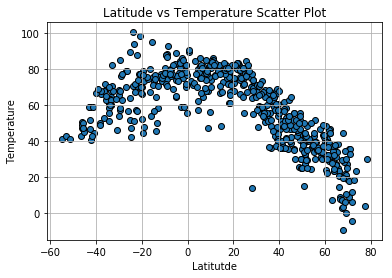

In [59]:
# Latitude vs Temperature scatter plot

plt.scatter(df.lat, df.temp, edgecolors = "black")
plt.title ('Latitude vs Temperature Scatter Plot')
plt.xlabel ('Latitutde')
plt.ylabel ('Temperature')
plt.grid()

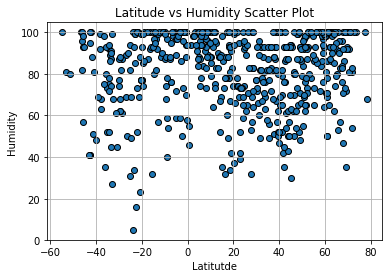

In [60]:
# Latitutde vs Humidity scatter plot

plt.scatter(df.lat, df.humidity, edgecolors = "black")
plt.title ('Latitude vs Humidity Scatter Plot')
plt.xlabel ('Latitutde')
plt.ylabel ('Humidity')
plt.grid()

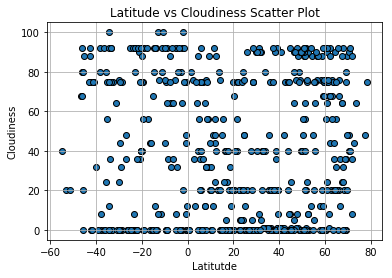

In [61]:
# Latitutde vs Cloudiness scatter plot

plt.scatter(df.lat, df.cloudiness, edgecolors = "black")
plt.title ('Latitude vs Cloudiness Scatter Plot')
plt.xlabel ('Latitutde')
plt.ylabel ('Cloudiness')
plt.grid()

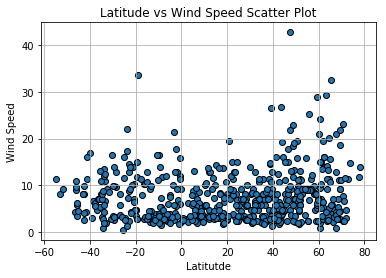

In [62]:
# Latitute vs Wind Speed scatter plot

plt.scatter(df.lat, df.wind_speed, edgecolors = "black")
plt.title ('Latitude vs Wind Speed Scatter Plot')
plt.xlabel ('Latitutde')
plt.ylabel ('Wind Speed')
plt.grid()